In [2]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np

In [36]:
N=100
dataset = "mnist"
mode = "sparse"
key_search = "fedavg"

top1_acc = []
K_list = [10,20,30,40]

for K in K_list:
    folder_path = f"../fedtask/{dataset}_{mode}_N{N}_K{K}/{dataset}/{mode}/{N}client/{dataset}_{mode}/"
    for filename in sorted(os.listdir(folder_path)):
        if key_search in filename:
            data = json.load(open(os.path.join(folder_path, filename), "r"))
            test_acc = data["test_accs"]
            top1_acc.append(np.max(test_acc))
            break

print(top1_acc)

[0.9022, 0.8934, 0.8939, 0.8927]


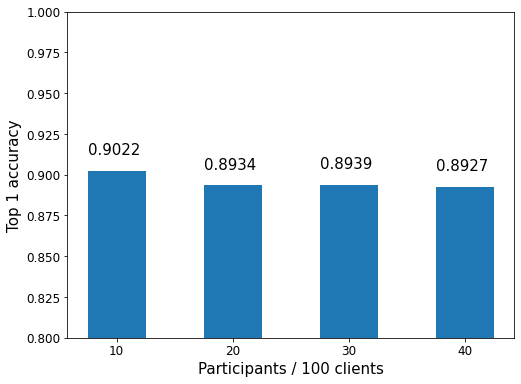

In [37]:
w = 5
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8,6))

plt.bar(x=K_list, height=top1_acc, width=w)
plt.xlabel(f"Participants / {N} clients", fontsize=15)
plt.ylabel(f"Top 1 accuracy", fontsize=15)

for i in range(len(top1_acc)):
    plt.text(x=K_list[i]-w/2, y=top1_acc[i]+0.01, s=str(top1_acc[i]), fontsize=15)

plt.xticks(ticks=K_list)
plt.ylim(0.8,1)
plt.show()